### Time series data, how is it different from "regular" data?

In [ ]:
import pandas as pd
data = {
    'subject_id': ['S1', 'S2', 'S3'],
    'heart_rate': [72, 68, 81],
    'step_count': [2, 5, 1],
    'body_temperature': [36.6, 36.7, 36.8]
}
df = pd.DataFrame(data)
print(df)


  subject_id  heart_rate  step_count  body_temperature
0         S1          72           2              36.6
1         S2          68           5              36.7
2         S3          81           1              36.8


In [ ]:
import pandas as pd
data = {
    'subject_id': ['S1', 'S1', 'S1', 'S2', 'S2', 'S2', 'S3', 'S3', 'S3'],
    'timestamp': [
        '2024-12-01 10:00:00', '2024-12-01 10:01:00', '2024-12-01 10:02:00',
        '2024-12-01 10:00:00', '2024-12-01 10:01:00', '2024-12-01 10:02:00',
        '2024-12-01 10:00:00', '2024-12-01 10:01:00', '2024-12-01 10:02:00',
    ],
    'heart_rate': [72, 75, 78, 68, 70, 72, 80, 82, 84],
    'step_count': [0, 2, 5, 1, 3, 6, 0, 4, 8]
}

df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index(['subject_id', 'timestamp'], inplace=True)

print(df)


                                heart_rate  step_count
subject_id timestamp                                  
S1         2024-12-01 10:00:00          72           0
           2024-12-01 10:01:00          75           2
           2024-12-01 10:02:00          78           5
S2         2024-12-01 10:00:00          68           1
           2024-12-01 10:01:00          70           3
           2024-12-01 10:02:00          72           6
S3         2024-12-01 10:00:00          80           0
           2024-12-01 10:01:00          82           4
           2024-12-01 10:02:00          84           8


In [ ]:
df_long = df.reset_index()
print(df_long)

  subject_id           timestamp  heart_rate  step_count
0         S1 2024-12-01 10:00:00          72           0
1         S1 2024-12-01 10:01:00          75           2
2         S1 2024-12-01 10:02:00          78           5
3         S2 2024-12-01 10:00:00          68           1
4         S2 2024-12-01 10:01:00          70           3
5         S2 2024-12-01 10:02:00          72           6
6         S3 2024-12-01 10:00:00          80           0
7         S3 2024-12-01 10:01:00          82           4
8         S3 2024-12-01 10:02:00          84           8


<h3>In many cases it will be beneficial to create a DataFrame per feature, with timestemps as columns, like this:

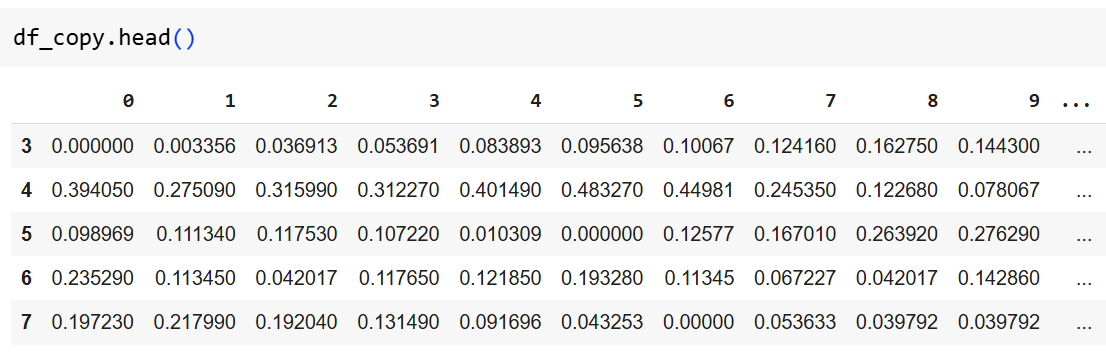

<h4> Time series can be

- Univariate, a single variable recorded over time, or
- Multivariate, multiple variables recorded over time

<h4> In this lesson we will focus on univariate time series only.   

### Simulating time series data

##### Step1: define the boundries

Create a time index that represents your desired sampling frequency and length

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

start = 0
stop = 100
number_of_points = 10**3
t = np.linspace(start, stop, number_of_points)

##### Step2: Define trend

In [ ]:
slope = 0.1
trend = slope * t

Trend can be any function of t. In this lesson we will focus on linear trends.

##### Step3: define seasonality

Create repeating patterns based on sine or cosine functions.

seasonality
(
𝑡
)
=
𝐴
⋅
sin
⁡
(
2
𝜋
𝑓
𝑡
+
𝜙
)

In [ ]:
amplitude = 2
period = 20
seasonality = amplitude * np.sin(2 * np.pi * t * 1 / 20)

(*) Period = Time length required for one complete cycle (here 20s)
Frequency = Number of cycles per unit of time t, freq = 1 / period (here 1/20Hz (assuming t is in sec))

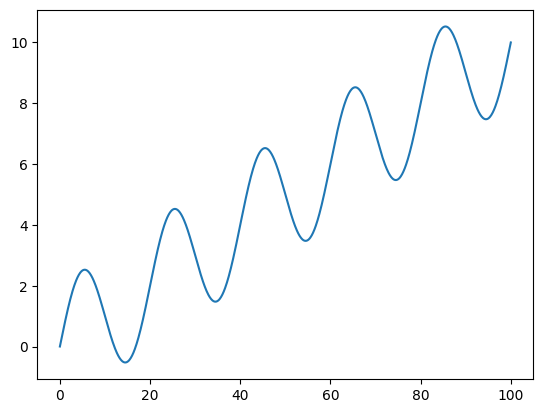

In [ ]:
plt.plot(t, trend+seasonality)
plt.show()

##### Step4: Add noise

In [ ]:
mean_ = 0
std_ = 0.5
noise = np.random.normal(mean_, std_, len(t))

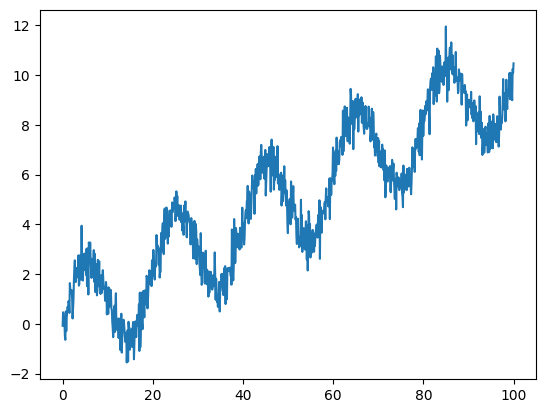

In [ ]:
plt.plot(t, trend+seasonality+noise)
plt.show()

TADAAA

We have a signal with trend and seasonality

Now if we want we can add all sort of goodies
For example, we can add spikes:

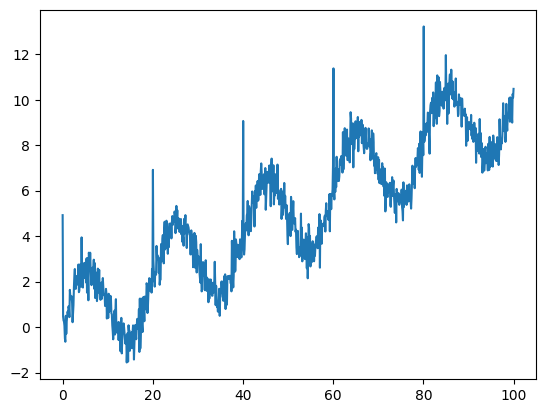

In [ ]:
spikes = np.zeros_like(t)
spikes[::200] = 5

plt.plot(t, trend+seasonality+noise+spikes)
plt.show()

Add Anomalies: Inject sudden, unusual changes

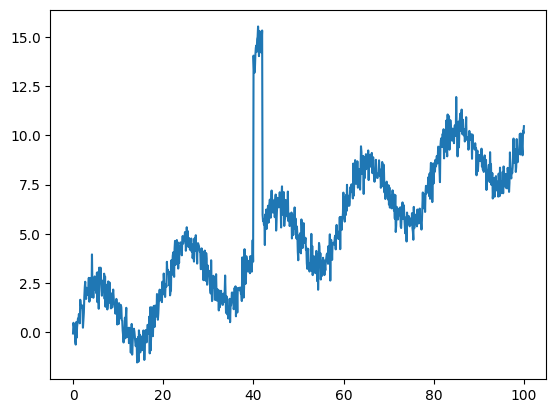

In [ ]:
anomalies = np.zeros_like(t)
start_anom, stop_anom = 400, 420
anomalies[start_anom:stop_anom] = 10

plt.plot(t, trend+seasonality+noise+anomalies)
plt.show()

One of the common tasks in time series analysis is decomposition and trend analysis.

What are the underlying components (trend, seasonality, noise) of the time series?

#### Optional: Store the synthetic data in a DataFrame

In [ ]:
data = trend+seasonality+noise
# fake time stemps :)
time_index = pd.date_range(start="2024-11-11", periods=number_of_points, freq="H")  # hourly data
df = pd.DataFrame({'Time': time_index, 'Data': data})
df.head()

<ipython-input-14-27d9d54bcd0d>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start="2024-11-11", periods=number_of_points, freq="H")  # hourly data


,Time,Data
0,2024-11-11 00:00:00,0.507671
1,2024-11-11 01:00:00,-0.337465
2,2024-11-11 02:00:00,0.102459
3,2024-11-11 03:00:00,-0.109218
4,2024-11-11 04:00:00,-0.152603


### Time Series Analysis

#### Generate synthetic eye movement data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def generate_eye_tracker_data_with_saccades(num_subjects, num_timesteps):
    data = []
    for subject in range(num_subjects):
        # Simulate baseline with small random fluctuations
        eye_positions = np.cumsum(np.random.normal(0, 0.25, num_timesteps))

        # Add trend (simulating a broken eye tracker)
        trend = np.linspace(0, 5, num_timesteps)  # Linear trend
        eye_positions += trend

        # Introduce saccades: large, sudden changes at random intervals
        num_saccades = np.random.randint(1, 2)  # Random number of saccades per subject
        saccade_indices = np.random.choice(num_timesteps, num_saccades, replace=False)
        saccade_magnitudes = np.random.uniform(4, 8, num_saccades)

        for idx, magnitude in zip(saccade_indices, saccade_magnitudes):
            eye_positions[idx:] += magnitude if np.random.rand() > 0.5 else -magnitude

        # Introduce missing data
        missing_indices = np.random.choice(num_timesteps, size=np.random.randint(1, 5), replace=False)
        eye_positions[missing_indices] = np.nan

        data.append(eye_positions)

    return pd.DataFrame(data, index=[f"Subject_{i+1}" for i in range(num_subjects)],
                        columns=[f"TS{t+1}" for t in range(num_timesteps)])


In [ ]:
num_subjects = 10
df = generate_eye_tracker_data_with_saccades(num_subjects, 50)
df.head()

,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,TS10,...,TS41,TS42,TS43,TS44,TS45,TS46,TS47,TS48,TS49,TS50
Subject_1,-0.204692,0.122194,-0.058814,-4.121731,-4.285611,-4.432769,-4.264864,-3.992604,-3.597951,-3.933113,...,0.543285,1.150255,1.535335,1.851864,2.006906,2.282224,2.587598,2.590665,NaN,3.242620
Subject_2,-0.036797,0.041912,-0.083413,-0.141771,0.158260,0.018795,-0.191074,-0.073491,-0.071317,-0.148269,...,3.145199,3.435858,3.344809,3.672703,3.754877,3.882804,-3.450689,-3.349234,-2.962909,NaN
Subject_3,-0.054440,-0.150167,-0.036117,0.196590,0.487456,0.586936,0.596417,0.336809,0.369837,0.726185,...,5.009757,4.887726,NaN,4.946637,11.031529,10.782655,10.609577,10.563042,10.552652,10.510648
Subject_4,-0.056552,-0.188010,-0.252679,0.123293,0.099807,0.645641,1.008643,1.090907,1.472812,1.959599,...,5.334454,5.161666,5.290573,5.287862,-0.503072,0.088800,0.240155,-0.007147,0.089909,-0.023531
Subject_5,0.086657,0.102568,0.718134,0.674345,0.707317,0.619218,0.114310,0.509698,0.787802,0.436131,...,9.164195,8.798536,8.683258,8.237282,8.175927,8.501542,8.901871,8.661572,8.736784,8.949205


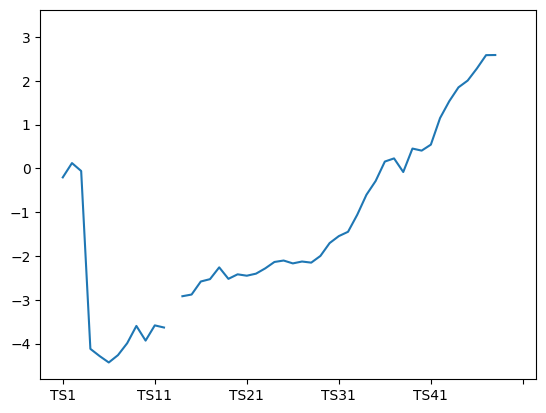

In [ ]:
df.loc['Subject_1'].plot()
plt.show()

In [ ]:
df.isna().sum().sum() #or isnull().sum() or info()

28

#### 1. Handle missing data

In [ ]:
# Performs linear interpolation along each row
cleaned_df = df.interpolate(axis=1, method='linear')
# In case of missing values at the start/end of the row
cleaned_df = cleaned_df.bfill(axis=1).ffill(axis=1)

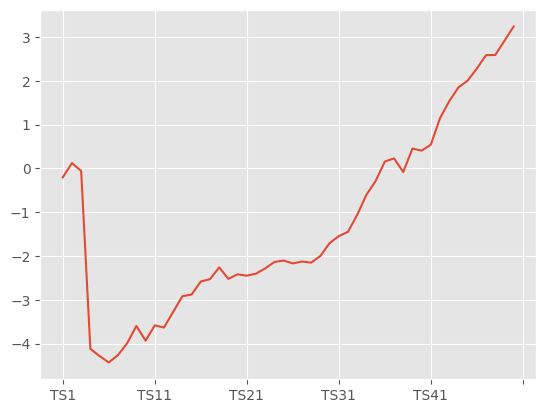

In [ ]:
plt.style.use('ggplot')
cleaned_df.loc['Subject_1'].plot()
plt.show()

#### 2. Smoothing

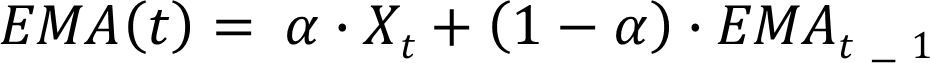

In [ ]:
def calculate_ma_ema(df, window_size=3, alpha=0.3):
  # OpI: Smoothing with running mean
  ma_df = df.apply(lambda row: np.convolve(row, np.ones(window_size)/window_size, mode='same'), axis=1)
  # OpII: Smoothing with exponential moving average
  ema_df = df.apply(lambda row: pd.Series(row).ewm(alpha=alpha).mean().to_numpy(), axis=1)
  result = pd.concat({"MA": ma_df, "EMA": ema_df}, axis=0)
  result.index.names = ["Smoothing", "Subject"]
  return result, ma_df, ema_df


In [ ]:
def plot_ma_vs_ema(smoothed_data, subject):
    subject_ma = smoothed_data.loc["MA"].loc[subject]
    subject_ema = smoothed_data.loc["EMA"].loc[subject]
    plt.figure(figsize=(12, 6))
    plt.plot(subject_ma, label="Moving Average", linestyle='--')
    plt.plot(subject_ema, label="Exponential Moving Average", linestyle='-.')
    plt.plot(df.loc[subject], label="Original Data", linestyle='-')
    plt.title(f"MA vs EMA - {subject}")
    plt.xlabel("Timestep")
    plt.ylabel("Eye Position (X)")
    plt.legend()
    plt.show()


EMAt = α⋅x
t
​
 +(1−α)⋅EMA
t−1
​


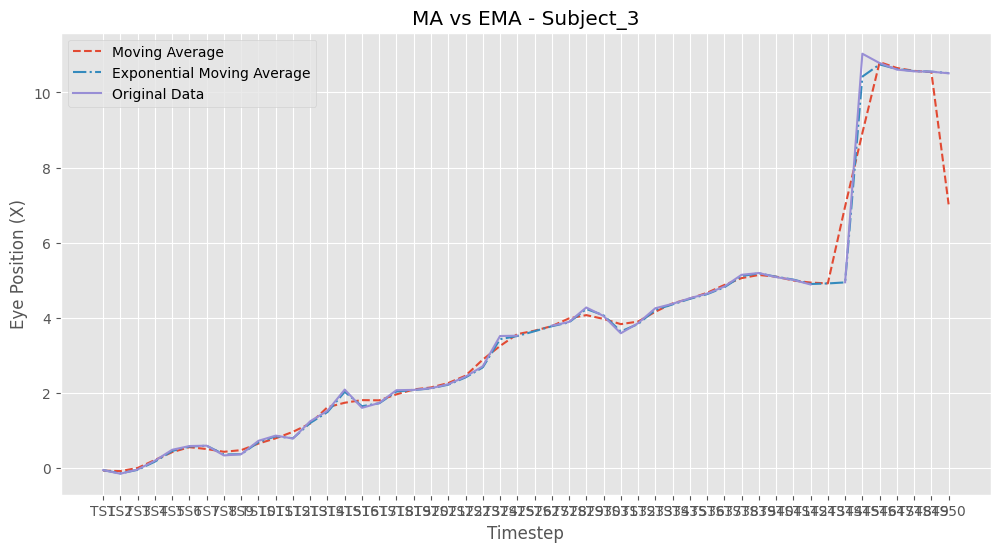

In [ ]:
smoothed_data, ma_df, ema_df = calculate_ma_ema(cleaned_df,3, alpha=0.9)
plot_ma_vs_ema(smoothed_data, 'Subject_3')

##### Housekeeping :)

In [ ]:
def series_to_dataframe(series_with_arrays, num_timesteps):
    # Create a DataFrame where each column corresponds to a timestep
    dataframe = pd.DataFrame(
        {f"TS{t+1}": series_with_arrays.apply(lambda arr: arr[t]) for t in range(num_timesteps)}
    )
    # Retain the original index from the Series
    dataframe.index = series_with_arrays.index
    dataframe.index.name = "Subject"
    return dataframe


In [ ]:
smoothed_ma_df = series_to_dataframe(ma_df, 50)

##### 3. Detect Outliers

In [ ]:
def detect_outliers_in_time(df, threshold=3): # examine rows
    z_scores = (df - df.mean(axis=1)) / df.std(axis=1)
    return (np.abs(z_scores) > threshold)

def detect_outliers_across_subjects(df, threshold=3): # examine columns
    z_scores = (df - df.mean(axis=0)) / df.std(axis=0)
    return (np.abs(z_scores) > threshold)

row_outliers = detect_outliers_in_time(cleaned_df)
column_outliers = detect_outliers_across_subjects(cleaned_df)


In [ ]:
def summarize_and_print_outliers(outliers_df, axis="row"):
    if axis == "row":
        print("Row-wise Outliers (Per Subject):")
        for subject, row in outliers_df.iterrows():
            outlier_timesteps = row[row].index.tolist()
            if outlier_timesteps:
                print(f"  {subject}: Outliers at timesteps {outlier_timesteps}")
        else:
            print("  No outliers found.")
    elif axis == "column":
        print("\nColumn-wise Outliers (Per Timestep):")
        for timestep in outliers_df.columns:
            outlier_subjects = outliers_df[timestep][outliers_df[timestep]].index.tolist()
            if outlier_subjects:
                print(f"  {timestep}: Outliers for subjects {outlier_subjects}")
        else:
            print("  No outliers found.")

summarize_and_print_outliers(row_outliers, axis="row")
summarize_and_print_outliers(column_outliers, axis="column")


Row-wise Outliers (Per Subject):
  No outliers found.

Column-wise Outliers (Per Timestep):
  No outliers found.


##### 4. Detect trend and seasonality

In [ ]:
def generate_eye_tracker_data_with_saccades(num_subjects, num_timesteps):
    data = []
    for subject in range(num_subjects):
        # Simulate baseline with small random fluctuations
        eye_positions = np.cumsum(np.random.normal(0, 0.25, num_timesteps))

        # Add trend (simulating a broken eye tracker)
        trend = np.linspace(0, 5, num_timesteps)  # Linear trend
        eye_positions += trend

        # Add Heartbeat (sine wave)
        heartbeat = 2 * np.sin(2 * np.pi * np.linspace(0, 1, num_timesteps))  # 1-cycle sine wave
        eye_positions += heartbeat

        # Introduce saccades: large, sudden changes at random intervals
        num_saccades = np.random.randint(1, 2)  # Random number of saccades per subject
        saccade_indices = np.random.choice(num_timesteps, num_saccades, replace=False)
        saccade_magnitudes = np.random.uniform(4, 8, num_saccades)

        for idx, magnitude in zip(saccade_indices, saccade_magnitudes):
            eye_positions[idx:] += magnitude if np.random.rand() > 0.5 else -magnitude

        data.append(eye_positions)

    return pd.DataFrame(data, index=[f"Subject_{i+1}" for i in range(num_subjects)],
                        columns=[f"TS{t+1}" for t in range(num_timesteps)])


In [ ]:
df = generate_eye_tracker_data_with_saccades(num_subjects, num_timesteps)

In [ ]:
def remove_trend(df):
    def detrend_row(row):
        time_indices = np.arange(len(row))
        # Fit a linear model (polynomial of degree 1) as we did in the numpy notebook
        linear_fit_coefficients = np.polyfit(time_indices, row, 1)
        print('trend coefficients: ', linear_fit_coefficients)

        # Subtract the trend values from the original row
        trend_values = np.polyval(linear_fit_coefficients, time_indices)
        detrended_row = row - trend_values
        return detrended_row

    # for each row apply the detrending function
    detrended_data = df.apply(detrend_row, axis=1)

    return detrended_data


In [ ]:
detrended_data = remove_trend(smoothed_ma_df)

trend coefficients:  [-0.17169094  1.14433874]
trend coefficients:  [ 0.24922376 -1.99802778]
trend coefficients:  [ 0.1552558 -0.4430185]
trend coefficients:  [ 0.05398916 -6.10274226]
trend coefficients:  [ 0.26974117 -2.22508716]
trend coefficients:  [ 0.34243989 -0.03661514]
trend coefficients:  [0.13562322 5.09218019]
trend coefficients:  [ 0.23517176 -1.14760965]
trend coefficients:  [-0.04121429 -1.42399682]
trend coefficients:  [-0.10692538 -0.89455163]


In [ ]:
linear_fits = df.apply(lambda row: np.polyfit(np.arange(len(row)), row, 1), axis=1)

In [ ]:
def plot_tredn(df, transformed_df, subject = 'Subject_1'):
    subject_ = df.loc[subject]
    transformed_subject = transformed_df.loc[subject]
    fit_params = linear_fits.loc[subject]
    timesteps = np.arange(len(subject_ma))
    fitted_line = np.polyval(fit_params, timesteps)
    plt.figure(figsize=(12, 6))
    plt.plot(timesteps, fitted_line, label=f"Fitted Line (y = {fit_params[0]:.2f}x + {fit_params[1]:.2f})",
             linestyle='-.')
    plt.plot(subject_, label="Moving Average", linestyle='--')
    plt.plot(transformed_subject, label="Detrend", linestyle='-')
    plt.xlabel("Timestep")
    plt.ylabel("Eye Position (X)")
    plt.legend()
    plt.show()


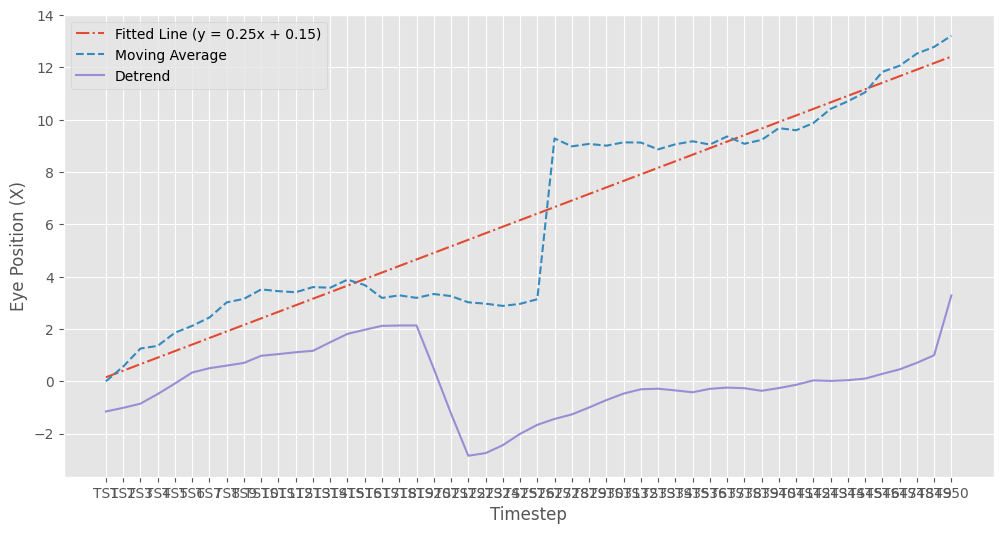

In [ ]:
plot_tredn(df, detrended_data, subject = 'Subject_1')

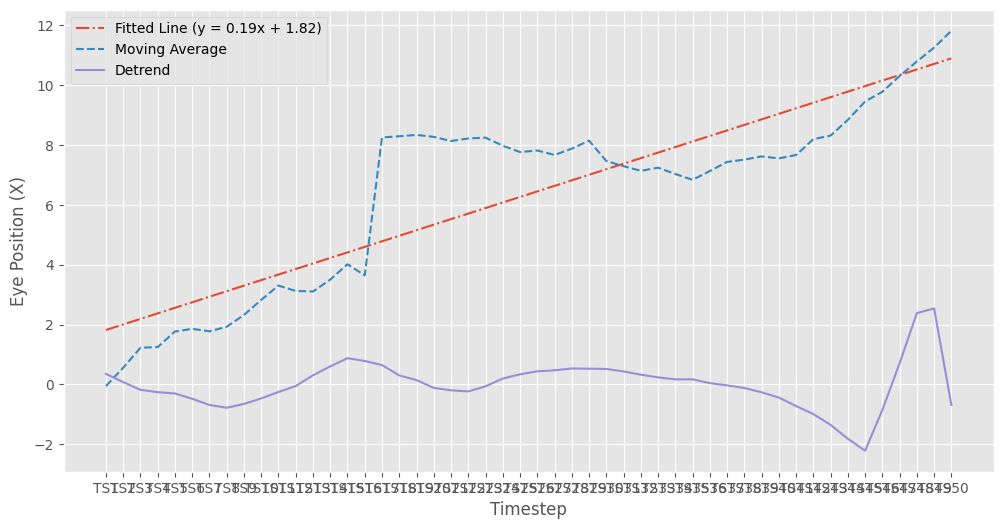

In [ ]:
plot_tredn(df, detrended_data, subject = 'Subject_3')

<h3> EEG

### MNE

https://mne.tools/stable/api/python_reference.html

In [ ]:
pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 61.8 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import mne

MNE has a sample dataset that we can use to become familiarized with processing EEG files. The below code shows how we can read a sample MEG/EEG file.

example datasets (called “Sample”), which contains EEG and MEG data from one subject performing an audiovisual experiment, along with structural MRI scans for that subject. The mne.datasets.sample.data_path function will automatically download the dataset

sample_audvis_filt-0-40_raw.fif = a filtered and downsampled version of the data

In [ ]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample', 'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw = raw.pick_types(meg=False, eeg=True, eog=False, exclude='bads')

Using default location ~/mne_data for sample...
Creating /root/mne_data


100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 211GB/s]
Untarring contents of '/root/mne_data/MNE-sample-data-processed.tar.gz' to '/root/mne_data'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Download complete in 02m12s (1576.2 MB)
Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


After DLing, we get a Raw object

In [ ]:
raw.info

<Info | 13 non-empty values
 bads: []
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 59 EEG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 59
 projs: Average EEG reference: off
 sfreq: 150.2 Hz
>

Araw.info shows us that:
- The dataset contains 59 EEG channels (each channel contains the data from one EEG electrode)
- The sampling rate is 150 Hz
- The data were filtered during reocording between 0.01–40 Hz (high-pass filter of 0.01 Hz, and low pass of 40)

To get full information:

In [ ]:
raw.info.keys()

dict_keys(['file_id', 'events', 'hpi_results', 'hpi_meas', 'subject_info', 'device_info', 'helium_info', 'hpi_subsystem', 'proc_history', 'meas_id', 'experimenter', 'description', 'proj_id', 'proj_name', 'meas_date', 'utc_offset', 'sfreq', 'highpass', 'lowpass', 'line_freq', 'gantry_angle', 'chs', 'dev_head_t', 'ctf_head_t', 'dev_ctf_t', 'dig', 'bads', 'ch_names', 'nchan', 'projs', 'comps', 'acq_pars', 'acq_stim', 'custom_ref_applied', 'xplotter_layout', 'kit_system_id'])

In [ ]:
# raw.info['ch_names']
raw.info['sfreq']

150.15374755859375

Lasy evalueation:

MNE reads the data file’s **header** into memory, and not the data itself.

Why?

Data files are often quite large, and so reading them in sometimes takes a noticeable amount of time, and consume significant memory.

In [ ]:
# Currently:
print(raw._data.shape)

AttributeError: 'Raw' object has no attribute '_data'

In [ ]:
raw.load_data()
print('Type: ', type(raw._data))
print('Shape: ',raw._data.shape)

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Type:  <class 'numpy.ndarray'>
Shape:  (59, 41700)


Plotting the raw data:

Using matplotlib as 2D backend.


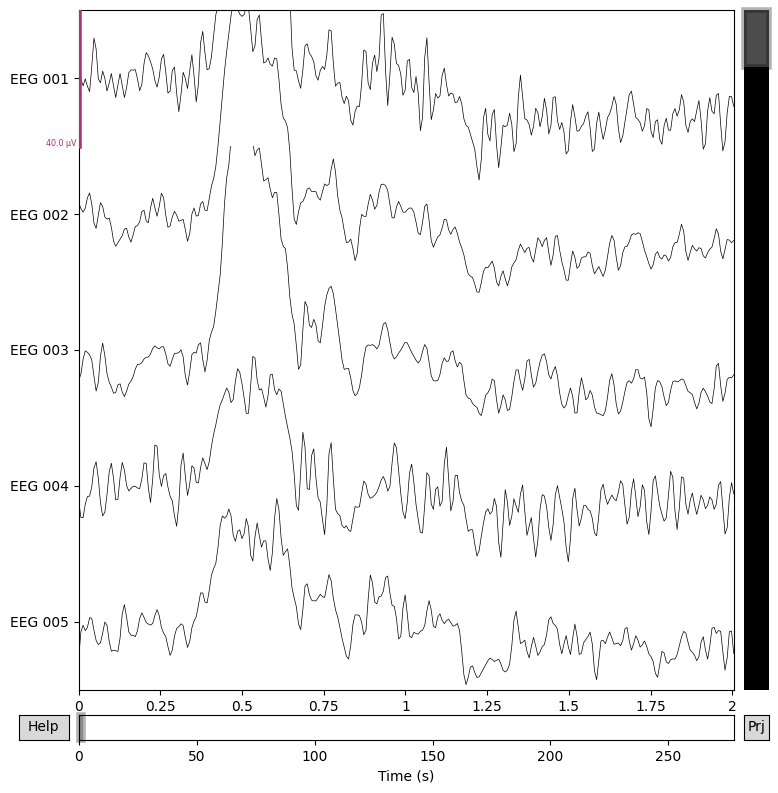

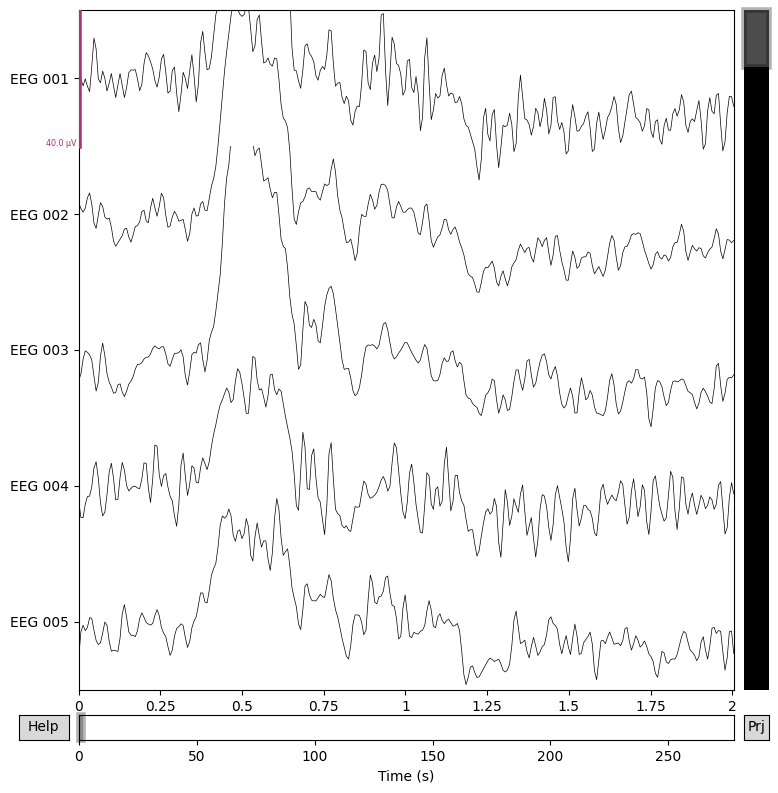

In [ ]:
raw.plot(duration=2, n_channels=5)

##### Descriptive stats

In [ ]:
raw.describe()

<Raw | sample_audvis_filt-0-40_raw.fif, 59 x 41700 (277.7 s), ~21.7 MiB, data loaded>
ch  name     type  unit        min         Q1     median         Q3        max
 0  EEG 001  EEG   µV      -300.18     -13.14      -3.69       7.06     267.67
 1  EEG 002  EEG   µV      -292.30      -4.01       5.15      15.81     270.47
 2  EEG 003  EEG   µV      -279.49       2.63      11.39      22.26     277.78
 3  EEG 004  EEG   µV      -209.77       8.40      20.08      32.22     242.74
 4  EEG 005  EEG   µV      -216.36      10.97      20.33      30.98     219.61
 5  EEG 006  EEG   µV      -237.24      -0.25       9.24      19.80     233.67
 6  EEG 007  EEG   µV      -253.08      -4.26       5.86      17.27     280.56
 7  EEG 008  EEG   µV      -162.02      17.23      27.71      38.67     322.31
 8  EEG 009  EEG   µV      -171.87      15.91      24.55      34.02     173.23
 9  EEG 010  EEG   µV      -182.08      -5.49       7.61      21.47     162.95
10  EEG 011  EEG   µV      -191.71      -3.46

#####  View the location of electrodes on the scalp

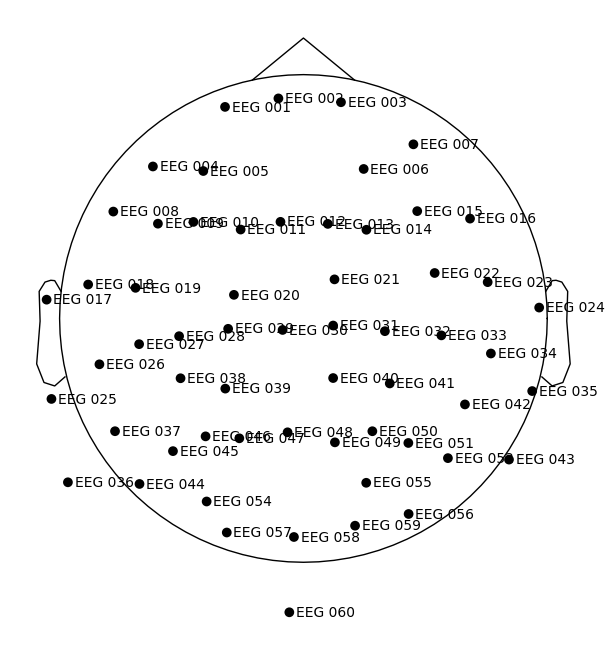

In [ ]:
raw.plot_sensors(show_names=True)
plt.show()

##### Plot Power spectrum

The power spectral density (PSD)
- Quantifies the power (amplitude) over a range of frequencies.
- Using Fast Fourier Transform.
- Time-consuming
- The frequency is a continuous variable that is divided into bins (bin size is determined automatically) and the amount of power is plotted for each frequency bin.
- The PSD is plotted separately for each electrode, and the color of the line indicates the position of the electrode on the scalp.

Effective window size : 13.639 (s)
Plotting power spectral density (dB=True).


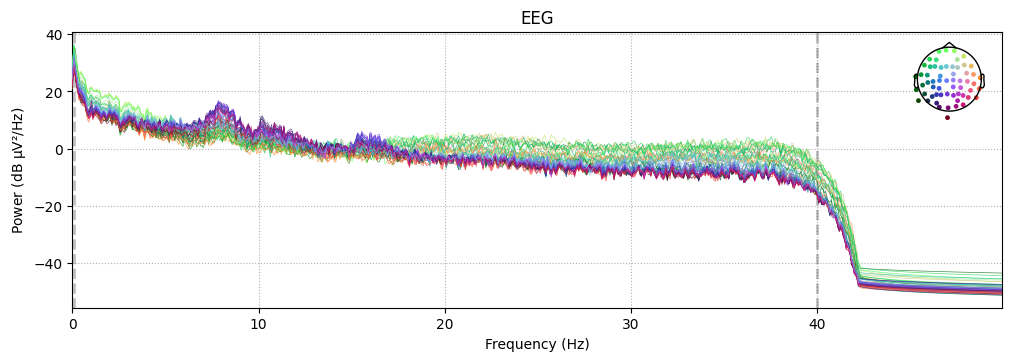

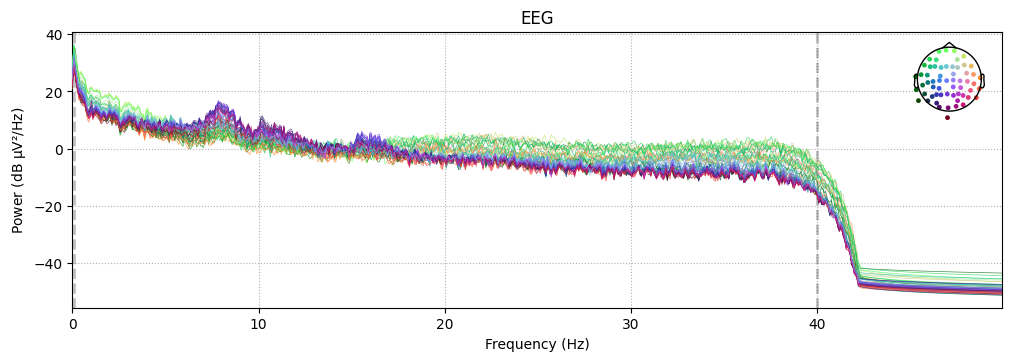

In [ ]:
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)

The mne.io.Raw class specifies over three dozen different methods, allowing the user to do things such as plot the raw data, mne.io.Raw.plot(), plot the locations of the electrodes on the head, mne.io.Raw.plot_sensors(), apply filters to it, mne.io.Raw.filter(), copy it, mne.io.Raw.copy(), or even convert it to a pandas DataFrame, mne.io.Raw.to_data_frame().

#### Your Turn: Extract the power bands (theta, delta, alpha, beta) from the EEG signal

Hint:

In [ ]:
from mne.baseline import rescale
from mne.datasets import somato
from mne.stats import bootstrap_confidence_interval

In [ ]:
data_path = somato.data_path()
subject = "01"
task = "somato"
raw_fname = data_path / f"sub-{subject}" / "meg" / f"sub-{subject}_task-{task}_meg.fif"

# Explore some frequency bands
iter_freqs = [("Theta", 4, 7), ("Alpha", 8, 12), ("Beta", 13, 25), ("Gamma", 30, 45)]

Using default location ~/mne_data for somato...


100%|████████████████████████████████████████| 611M/611M [00:00<00:00, 109GB/s]
Untarring contents of '/root/mne_data/MNE-somato-data.tar.gz' to '/root/mne_data'


Download complete in 38s (582.2 MB)


In [ ]:
# set epoching parameters
event_id, tmin, tmax = 1, -1.0, 3.0
baseline = None

# get the header to extract events
raw = mne.io.read_raw_fif(raw_fname)
events = mne.find_events(raw, stim_channel="STI 014")

frequency_map = list()

for band, fmin, fmax in iter_freqs:
    # (re)load the data to save memory
    raw = mne.io.read_raw_fif(raw_fname)
    raw.pick(picks=["grad", "eog"])  # we just look at gradiometers
    raw.load_data()

    # bandpass filter
    raw.filter(
        fmin,
        fmax,
        n_jobs=None,  # use more jobs to speed up.
        l_trans_bandwidth=1,  # make sure filter params are the same
        h_trans_bandwidth=1,
    )  # in each band and skip "auto" option.

    # epoch
    epochs = mne.Epochs(
        raw,
        events,
        event_id,
        tmin,
        tmax,
        baseline=baseline,
        reject=dict(grad=4000e-13, eog=350e-6),
        preload=True,
    )
    # remove evoked response
    epochs.subtract_evoked()

    # get analytic signal (envelope)
    epochs.apply_hilbert(envelope=True)
    frequency_map.append(((band, fmin, fmax), epochs.average()))
    del epochs
del raw

Opening raw data file /root/mne_data/MNE-somato-data/sub-01/meg/sub-01_task-somato_meg.fif...
    Range : 237600 ... 506999 =    791.189 ...  1688.266 secs
Ready.
111 events found on stim channel STI 014
Event IDs: [1]
Opening raw data file /root/mne_data/MNE-somato-data/sub-01/meg/sub-01_task-somato_meg.fif...
    Range : 237600 ... 506999 =    791.189 ...  1688.266 secs
Ready.
Reading 0 ... 269399  =      0.000 ...   897.077 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 993 samples (3.307 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    4.0s


Not setting metadata
111 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 111 events and 1202 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
3 bad epochs dropped
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: EOG 061
[done]
Opening raw data file /root/mne_data/MNE-somato-data/sub-01/meg/sub-01_task-somato_meg.fif...
    Range : 237600 ... 506999 =    791.189 ...  1688.266 secs
Ready.
Reading 0 ... 269399  =      0.000 ...   897.077 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lo

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    2.4s


Not setting metadata
111 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 111 events and 1202 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
3 bad epochs dropped
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: EOG 061
[done]
Opening raw data file /root/mne_data/MNE-somato-data/sub-01/meg/sub-01_task-somato_meg.fif...
    Range : 237600 ... 506999 =    791.189 ...  1688.266 secs
Ready.
Reading 0 ... 269399  =      0.000 ...   897.077 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- L

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.5s


Not setting metadata
111 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 111 events and 1202 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
3 bad epochs dropped
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: EOG 061
[done]
Opening raw data file /root/mne_data/MNE-somato-data/sub-01/meg/sub-01_task-somato_meg.fif...
    Range : 237600 ... 506999 =    791.189 ...  1688.266 secs
Ready.
Reading 0 ... 269399  =      0.000 ...   897.077 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- L

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    1.4s


Not setting metadata
111 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 111 events and 1202 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
3 bad epochs dropped
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: EOG 061
[done]


Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


Text(0.5, 0, 'Time [ms]')

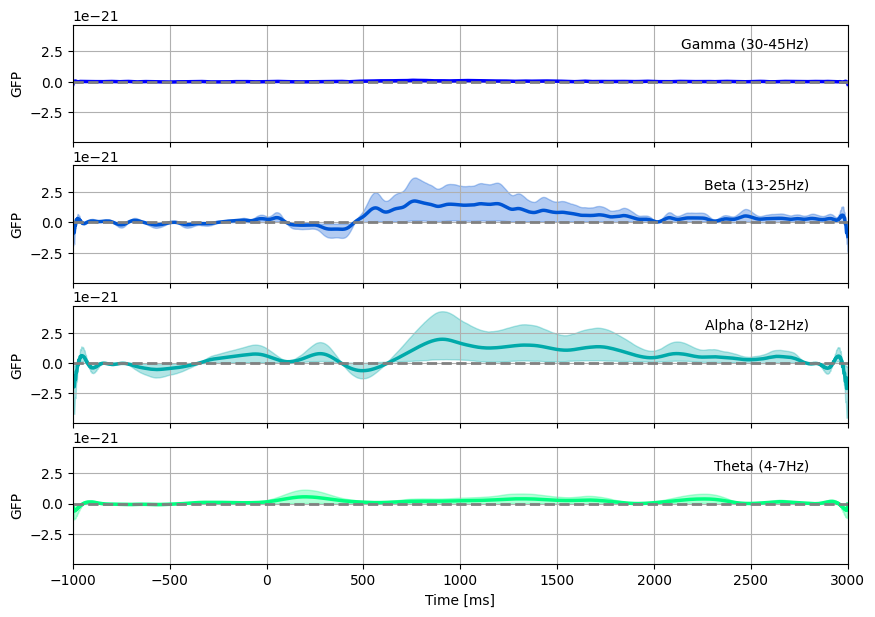

In [ ]:
# Helper function for plotting spread
def stat_fun(x):
    """Return sum of squares."""
    return np.sum(x**2, axis=0)


# Plot
fig, axes = plt.subplots(4, 1, figsize=(10, 7), sharex=True, sharey=True)
colors = plt.colormaps["winter_r"](np.linspace(0, 1, 4))
for ((freq_name, fmin, fmax), average), color, ax in zip(
    frequency_map, colors, axes.ravel()[::-1]
):
    times = average.times * 1e3
    gfp = np.sum(average.data**2, axis=0)
    gfp = mne.baseline.rescale(gfp, times, baseline=(None, 0))
    ax.plot(times, gfp, label=freq_name, color=color, linewidth=2.5)
    ax.axhline(0, linestyle="--", color="grey", linewidth=2)
    ci_low, ci_up = bootstrap_confidence_interval(
        average.data, random_state=0, stat_fun=stat_fun
    )
    ci_low = rescale(ci_low, average.times, baseline=(None, 0))
    ci_up = rescale(ci_up, average.times, baseline=(None, 0))
    ax.fill_between(times, gfp + ci_up, gfp - ci_low, color=color, alpha=0.3)
    ax.grid(True)
    ax.set_ylabel("GFP")
    ax.annotate(
        f"{freq_name} ({fmin:d}-{fmax:d}Hz)",
        xy=(0.95, 0.8),
        horizontalalignment="right",
        xycoords="axes fraction",
    )
    ax.set_xlim(-1000, 3000)

axes.ravel()[-1].set_xlabel("Time [ms]")

Taken from: https://mne.tools/stable/auto_examples/time_frequency/time_frequency_global_field_power.html